In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import precision_score, confusion_matrix
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('../../')
from lib import plotModule

In [2]:
# Load
classes = pd.read_csv('../../data/classes.csv')
previsores = pd.read_csv('../../data/previsores.csv')
previsores.head()

,clientid,income,age,loan
0,-1.731185,1.453934,1.365380,1.202819
1,-1.729453,-0.762176,0.542659,0.696427
2,-1.727721,0.836821,1.674171,1.174711
3,-1.725989,-0.183070,0.364136,0.544980
4,-1.724257,1.509563,-1.686475,1.420765


In [3]:
previsores.drop('clientid', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(previsores, classes, test_size=0.25, random_state=0)

In [4]:
clf = RandomForestClassifier(n_estimators=10, criterion='entropy')
clf.fit(X_train, y_train)

print(X_train.columns)
print(clf.feature_importances_)

Index(['income', 'age', 'loan'], dtype='object')
[0.15264219 0.48975004 0.35760777]


In [5]:
y_pred = clf.predict(X_test)

print("accuracy", accuracy_score(y_test, y_pred))
print("precision", precision_score(y_test, y_pred))
print("recall", recall_score(y_test, y_pred))
print("f1", f1_score(y_test, y_pred))

accuracy 0.978
precision 0.9344262295081968
recall 0.890625
f1 0.9120000000000001


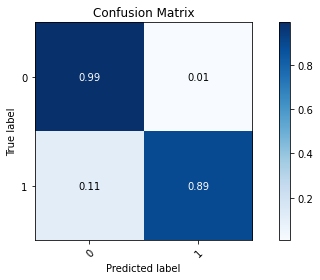

In [6]:
confMatrix = plotModule.ConfusionMatrix()
fig = plt.figure(figsize=(15, 4), facecolor='w')

confMatrix.plot(cm=confusion_matrix(y_test, y_pred),
                classes=classes['default'].unique(),
                title='Confusion Matrix',
                fig=fig,
                subplot_index=1)